In [1]:
from os.path import join

import sympy
from sympy import Symbol, sqrt, cos, pi, symbols
import numpy as np
import matplotlib.pylab as plt

import qnet
from qnet.algebra import *

import QDYN

from src.notebook_plots_v1 import plot_bs_decay, display_hamiltonian, display_eq, show_summary_dicke
from src.single_sided_network_v1 import network_slh
from src.dicke_half_model_v1 import write_dicke_half_model, err_dicke_half

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
qnet.init_printing()

$
\newcommand{ket}[1]{\vert #1 \rangle}
\newcommand{bra}[1]{\langle #1 \vert}
\newcommand{Op}[1]{\hat{#1}}
$

# Optimized Creation of Dicke State

## Can we create the Dicke states for 4 Nodes and T=1000 with density matrix OCT?

In [4]:
slh = network_slh(n_cavity=2, n_nodes=4, topology='driven_bs_fb')
write_dicke_half_model(
    slh, rf='./data/4nodes_T1000_rho', T=1000, theta=0,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.01)

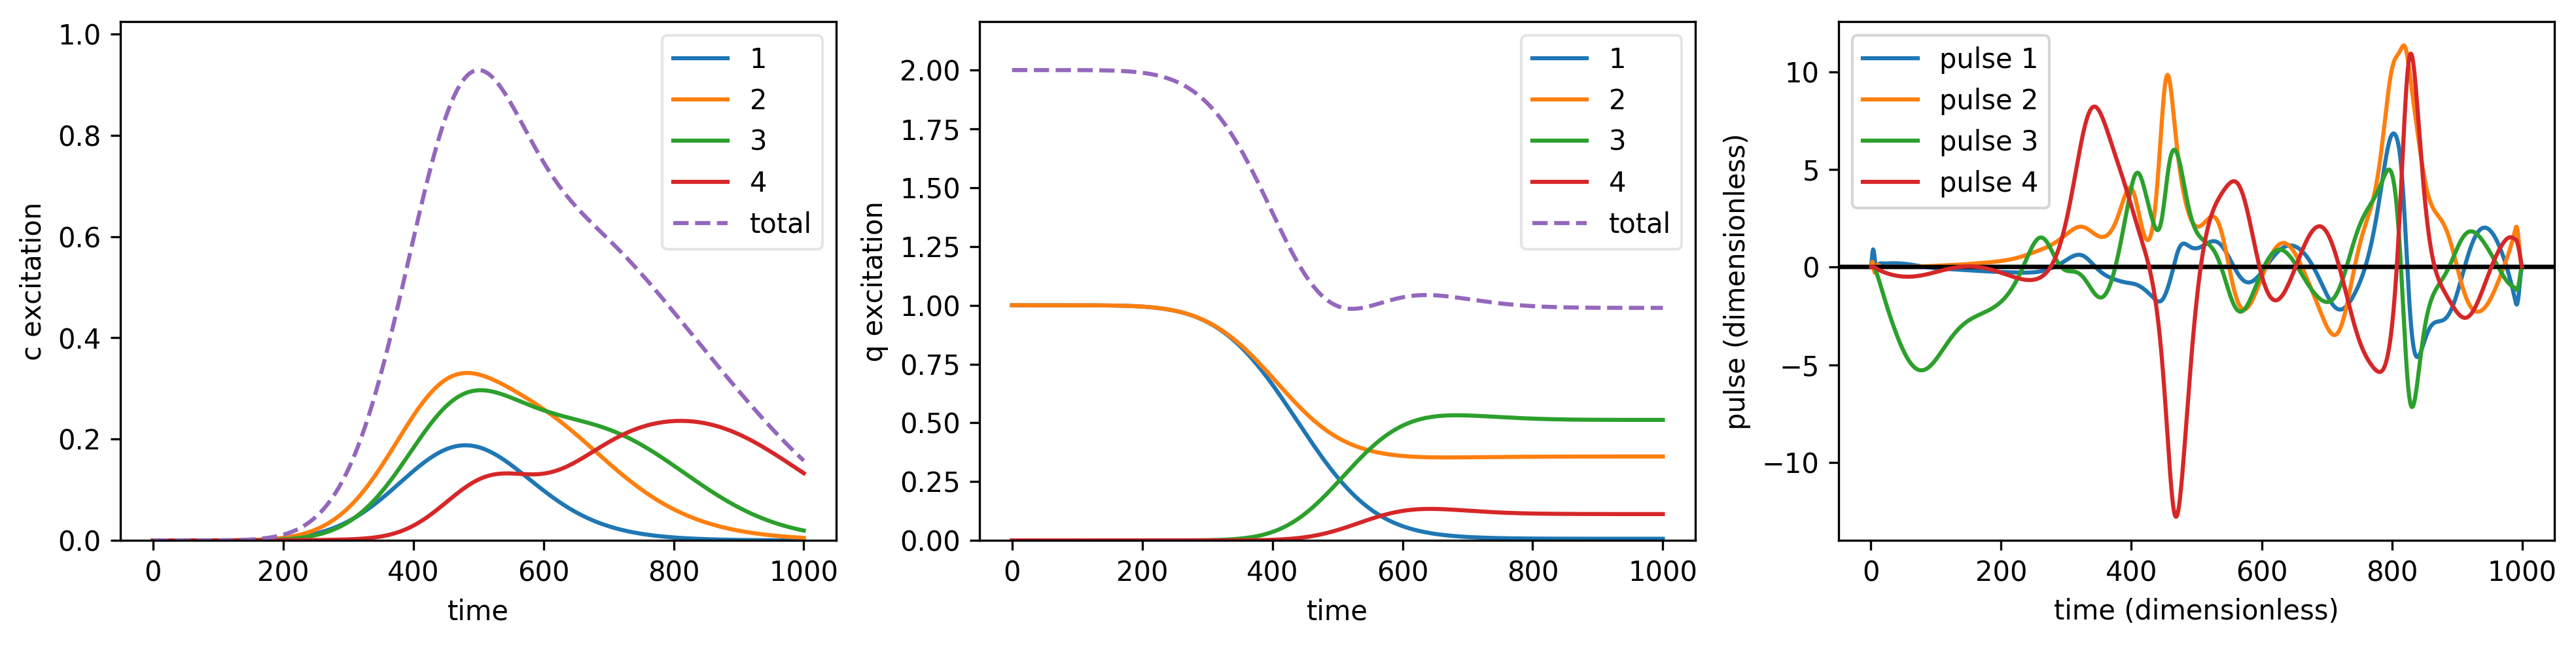

In [5]:
show_summary_dicke('./data/4nodes_T1000_rho', dpi=300)

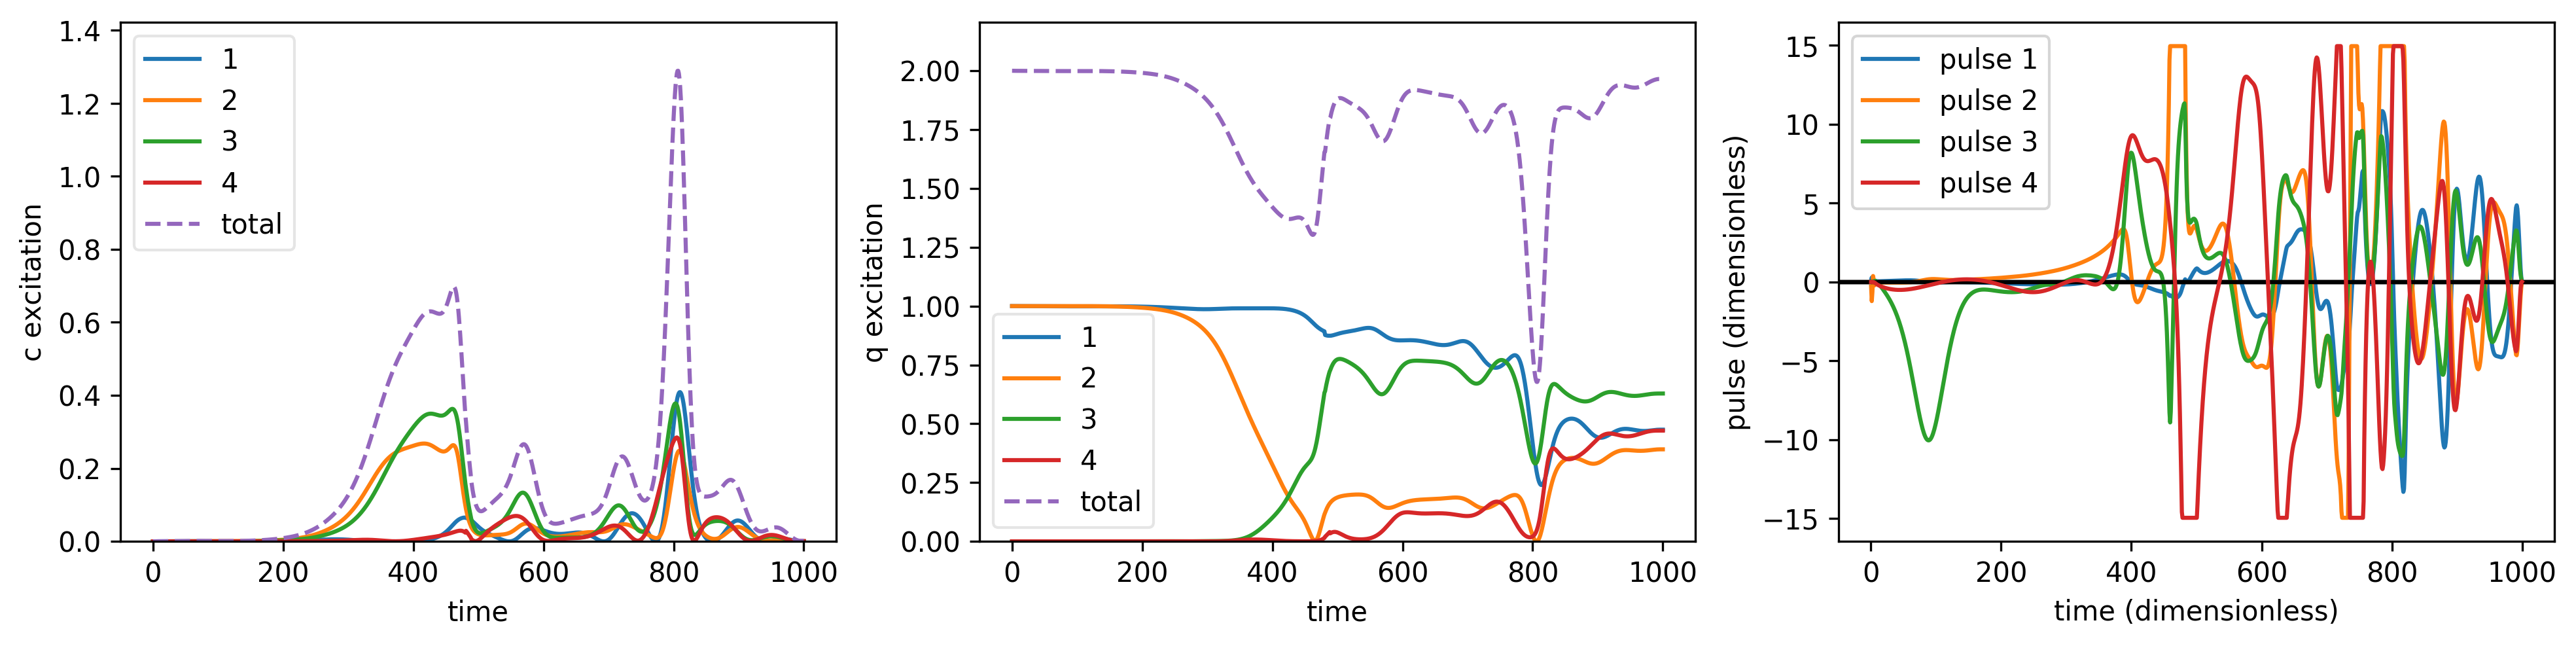

In [6]:
show_summary_dicke('./data/4nodes_T1000_traj2', dpi=300)

In [7]:
def plot_convergenc(rf):
    fn = join(rf, 'oct_iters.dat')
    it, J_T = np.genfromtxt(fn, usecols=(0, 1), unpack=True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(it, J_T, '-')
    ax.set_yscale('log')
    ax.set_xlabel(r'iteration')
    ax.set_ylabel(r'optimization error')
    plt.show(fig)

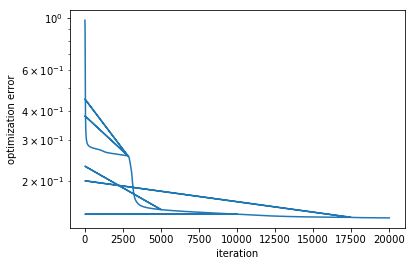

In [8]:
plot_convergenc('./data/4nodes_T1000_traj2')

## Can we do trajectory optimization?

In [9]:
slh = network_slh(n_cavity=2, n_nodes=4, topology='driven_bs_fb')
write_dicke_half_model(
    slh, rf='./data/4nodes_T1000_traj', T=1000, theta=0,
    E0_cycles=2, mcwf=True, non_herm=True, lambda_a=0.01)

# Example optimization commands

*   density matrix optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --J_T=J_T_re .```

*   trajectory optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --n-trajs=20 --J_T=J_T_sm .```
   
*   density matrix propagation

    ```OMP_NUM_THREADS=1 qdyn_prop_traj --use-oct-pulses --write-final-state=state_final.dat .```